# **Capstone project: Providing data-driven suggestions for HR**

# **HR Analytics for Sailfort motors**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


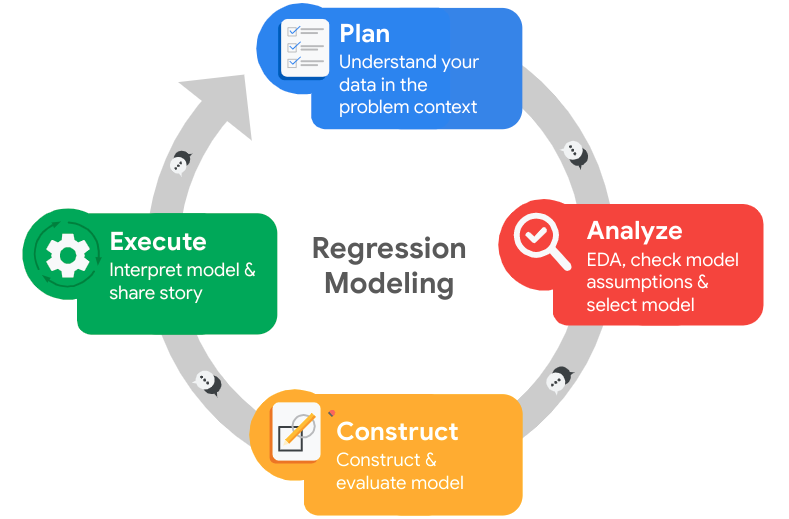

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




->The HR Managers who delegated the tasks are the main stakeholders for the project.

->Trying to find out reasons for attrition and predicting attrition possibility with data is the main objective in this analysis.

-> The data is a mix of categorical and numerical data

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages: Importing packages used for analysis

In [1]:
# Import packages

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.linear_model import LinearRegression, LogisticRegression

import sklearn.metrics as mt


In [2]:
import matplotlib.pyplot as plt

import seaborn as sns

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe

df = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe

df.head(12)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.shape

(14999, 10)

### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###

df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed

df= df.rename(columns={'average_montly_hours': 'average_monthly_hours'})

# Display all column names after the update

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values

df.isna().any(axis=0)

satisfaction_level       False
last_evaluation          False
number_project           False
average_monthly_hours    False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [10]:
df.isna().any(axis=1).sum()

0

### Check duplicates

Check for any duplicate entries in the data.

In [11]:
# Check for duplicates

df.duplicated().sum()

3008

In [12]:
# Inspect some rows containing duplicates as needed

dupli=df[df.duplicated()]

dupli

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [13]:
# Drop duplicates and save resulting dataframe in a new variable as needed

df1 =df.drop_duplicates()

# Display first few rows of new dataframe as needed

df1.duplicated().sum()

0

### Check outliers

Check for outliers in the data.

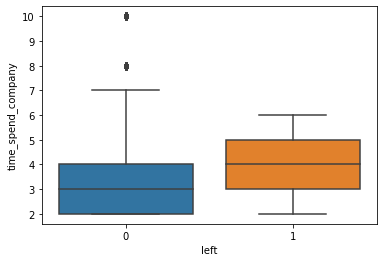

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

sns.boxplot(data=df1, x='left', y='time_spend_company')

As we can see, there aren't many outliers for **left** status **'1'**, but a good number of outliers for **left=0**

###Checking for outliers in the data

In [15]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

avg_time_spent= df1['time_spend_company'].mean()

std_dev_time= df1['time_spend_company'].std()

low_lim= avg_time_spent - 3*std_dev_time

up_lim= avg_time_spent + 3*std_dev_time


outliers = df1[ (df1['time_spend_company']<low_lim) | (df1['time_spend_company']>up_lim) ]

outliers

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
11007,0.49,0.67,2,190,8,0,0,0,marketing,medium
11008,0.92,0.99,3,176,8,0,0,0,sales,medium
11009,0.81,0.55,4,217,8,0,0,0,accounting,medium
11010,0.62,0.91,3,269,8,0,0,0,support,medium
11011,0.21,0.70,3,238,8,0,0,0,technical,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


There are **188** outliers in the data, if we take **3** standard deviations

In [16]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

low_lim_2= avg_time_spent - 4*std_dev_time

up_lim_2= avg_time_spent + 4*std_dev_time


outliers_2 = df1[ (df1['time_spend_company']<low_lim_2) | (df1['time_spend_company']>up_lim_2) ]

outliers_2

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
11078,0.69,0.88,3,164,10,0,0,0,management,medium
11124,0.29,0.75,6,271,10,0,0,0,sales,medium
11193,0.75,0.60,4,186,10,1,0,0,marketing,low
11194,0.61,0.89,3,242,10,0,0,0,sales,high
11195,0.47,0.79,3,284,10,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


There are **107** data outliers if we take **4** standard deviations

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

From the given data, 83.3% of the individuals are still in the organization, and 16.6% of the employyes have left the organization.

In [17]:
#Getting percentage of attrition

(df1['left'].value_counts(normalize=True))*100

0    83.39588
1    16.60412
Name: left, dtype: float64

**Getting a count plot for the categorical 'left' variable**

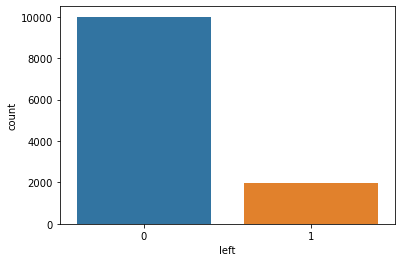

In [18]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###

sns.countplot(x='left', data=df1)

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

**Barplot on the satisfaction level with respect to time spent at company**

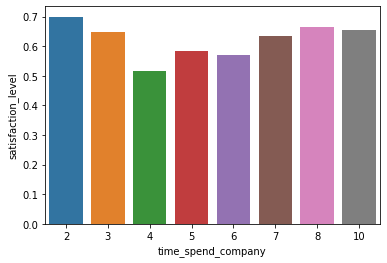

In [19]:
# Create a plot as needed

sns.barplot(x='time_spend_company', y='satisfaction_level', data=df1, estimator=np.mean, ci=None)

**Bar plot on attrition levels by Project Number**

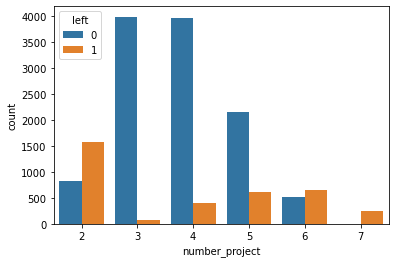

In [20]:
# Create a plot as needed

grouped = df.groupby(['number_project', 'left']).size().reset_index(name='count')

sns.barplot(x='number_project', y='count', hue='left', data=grouped)


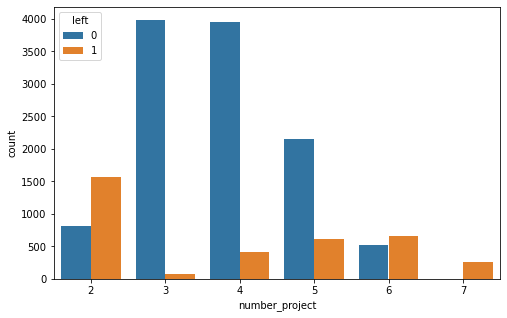

In [21]:
# Create a plot as needed
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='number_project', hue='left')

There is a higher ratio of people leaving, for individuals belonging to project **2, 6 and 7**. In project **7**, majority have left.

**Plotting a pair plot to check for the relationship between the different variables in the dataframe.**

The data is sampled for easier visualization.

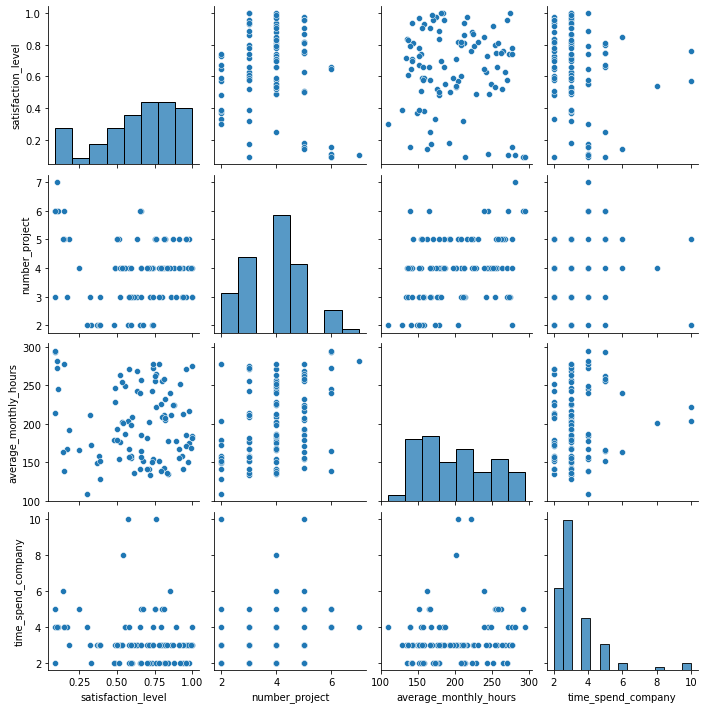

In [22]:
# Create a plot as needed

sampled= df1.sample(100, replace=False, random_state=42)

sns.pairplot(data= sampled[['satisfaction_level', 'number_project', 'average_monthly_hours', 'time_spend_company']])

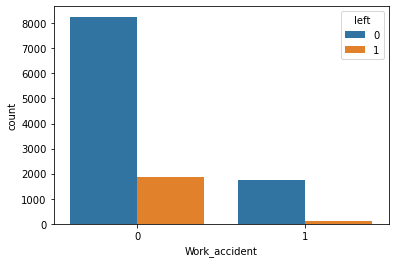

In [23]:
# Create a plot as needed

sns.countplot(x='Work_accident', hue='left', data=df1)

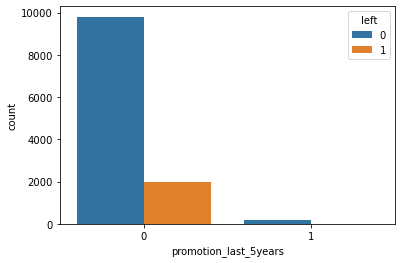

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###

sns.countplot(x='promotion_last_5years', hue='left', data=df1)

**Regression plot on Satisfaction level vs Average Monthly Hours**

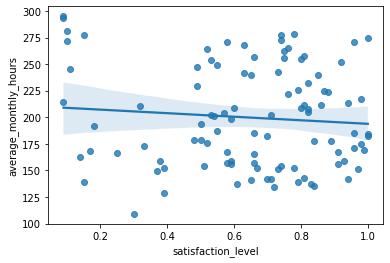

In [25]:
sns.regplot(x = "satisfaction_level", y = "average_monthly_hours", data = sampled)

### Insights

-> Majority of the people who left where from projects 2, 6, 7. <br>
-> Promotion in the last 5 years did not hold a significant x-factor when it comes to attrition. <br>
-> Same goes for work accident<br>
-> Satisfaction level increase with reducing average monthly hours<br>

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



The independent variables chosen are satisfaction_level, Project number, Average monthly hours and time spent at company.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Predicting the leaving status, i.e.

1, if the candidate has left or, <br>
0, if the candidate has not left

### Identify the types of models most appropriate for this task.

Logistic Regression, Random Forest Classifier and XGBoost Classifier are the most suitable models for the task.

### Modeling

Add as many cells as you need to conduct the modeling process.

**Getting dummies for categorical variables**

In [26]:
df1= pd.get_dummies(df1)

df1

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11996,0.74,0.95,5,266,10,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11997,0.85,0.54,3,185,10,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11998,0.33,0.65,3,172,10,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [27]:
print(df1.dtypes)        # Are all columns numeric?
print(df1.isnull().sum())  # Any NaNs?
print(df1.shape)         # Shape confirmation

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_monthly_hours       int64
time_spend_company          int64
Work_accident               int64
left                        int64
promotion_last_5years       int64
Department_IT               uint8
Department_RandD            uint8
Department_accounting       uint8
Department_hr               uint8
Department_management       uint8
Department_marketing        uint8
Department_product_mng      uint8
Department_sales            uint8
Department_support          uint8
Department_technical        uint8
salary_high                 uint8
salary_low                  uint8
salary_medium               uint8
dtype: object
satisfaction_level        0
last_evaluation           0
number_project            0
average_monthly_hours     0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
Department_IT             0
Department_RandD    

**Splitting data into training and testing**

In [28]:
### YOUR CODE HERE ###

# Split dataset into training and holdout datasets


y=df1['left']

X= df1.drop(['left'], axis=1)



X.head()

#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

#clf = LogisticRegression().fit(X_train,y_train)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [29]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [30]:
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [31]:
!pip install --upgrade xgboost

You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42) 

#Instantiating a random model of XGBoost
model = XGBClassifier(
    max_depth=3,
    n_estimators=10,
    learning_rate=0.1,
    verbosity=2,
    tree_method='hist',  # faster than 'auto'
    n_jobs=1             # avoid deadlocks during debugging
)

model.fit(X_train, y_train)

[06:06:46] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:06:46] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:06:46] INFO: ../src/data/simple_dmatrix.cc:102: Generating new Gradient Index.
[06:06:46] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:06:46] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:06:46] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:06:46] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:06:46] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=1,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [34]:


xgb=XGBClassifier(objective='binary:logistic', random_state=0, tree_method='hist', verbosity=2)

#clf = logit.fit(X_train,y_train)

xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='binary:logistic',
              predictor=None, random_state=0, reg_alpha=None, ...)

**Hyper-parameter tuning for XGBoost using GridSearchCV**

In [35]:
cv_params = {'max_depth': [6,8], 
             'min_child_weight': [2,4],
             'learning_rate': [0.2],
             'n_estimators': [100]
             }    

scoring = {'accuracy', 'precision', 'recall', 'f1'}

xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1', verbose=2)

In [36]:
%%time
#Fitting Grid search
xgb_cv.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[06:07:00] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:07:00] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:07:00] INFO: ../src/data/simple_dmatrix.cc:102: Generating new Gradient Index.
[06:07:06] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:07:09] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:07:10] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:07:11] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:07:15] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.7min remaining:    0.0s


[06:11:43] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:11:43] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:11:43] INFO: ../src/data/simple_dmatrix.cc:102: Generating new Gradient Index.
[06:11:49] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:11:50] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:11:54] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:11:57] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:11:57] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 39.5min finished


[06:46:27] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:46:27] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:46:27] INFO: ../src/data/simple_dmatrix.cc:102: Generating new Gradient Index.
[06:46:28] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:46:28] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:46:28] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:46:33] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:46:35] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                   

**Getting results of the XGBoost Model**

In [37]:
print('\n All results:')
print(xgb_cv.cv_results_)


 All results:
{'mean_fit_time': array([290.09485297,  50.47671461,  65.87636108,  66.02106323]), 'std_fit_time': array([13.02687406,  8.05769647, 26.30607445, 24.89904568]), 'mean_score_time': array([0.24235878, 0.18272099, 0.202108  , 0.27836404]), 'std_score_time': array([0.07911621, 0.11376354, 0.06333033, 0.04060129]), 'param_learning_rate': masked_array(data=[0.2, 0.2, 0.2, 0.2],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[6, 6, 8, 8],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[2, 4, 2, 4],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[100, 100, 100, 100],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'learning_rate': 0.2, 'max_depth': 6

**Getting the hyper parameter values for the best estimator**

In [38]:
print('\n Best estimator:')
print(xgb_cv.best_estimator_)


 Best estimator:
[06:51:19] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)


**Generating an XGBoost Classifier model with the optimized Hyper Parameters**

In [39]:
optimized_model = XGBClassifier(
    max_depth=8,
    min_child_weight=2,
    n_estimators=100,
    learning_rate=0.2,
    verbosity=2,
    tree_method='hist',  # faster than 'auto'
    n_jobs=1,             # avoid deadlocks during debugging
    objective='binary:logistic'
)

optimized_model.fit(X_train, y_train)

[06:51:23] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:51:23] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:51:23] INFO: ../src/data/simple_dmatrix.cc:102: Generating new Gradient Index.
[06:51:23] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:51:23] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:51:23] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:51:23] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[06:51:23] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

**Predicting values using the optimized model**

In [40]:
predicted= optimized_model.predict(X_test)

predicted

array([1, 0, 0, ..., 0, 0, 0])

**Metrics for Model accuracy in prediction**

In [41]:
import sklearn.metrics as mt

print("Accuracy:", "%.3f" % mt.accuracy_score(y_test, predicted))
print("Precision:", "%.3f" % mt.precision_score(y_test, predicted))
print("Recall:", "%.3f" % mt.recall_score(y_test, predicted))
print("F1 Score:", "%.3f" % mt.f1_score(y_test, predicted))


Accuracy: 0.980
Precision: 0.976
Recall: 0.903
F1 Score: 0.938


**Confusion Matrix for the predicted classes**

In [42]:
cm= mt.confusion_matrix(y_test,predicted,labels=optimized_model.classes_)

print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[2490   11]
 [  48  449]]


**Colour Map for the Confusion Matrix**

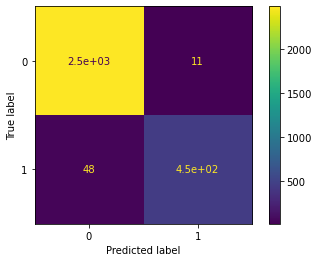

In [43]:
disp = mt.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = optimized_model.classes_)

disp.plot()

**Feature importance Plot for each feature in the dataset**

The Variables *satisfaction level*, *average_monthly_hours*, *last_evaluation* have the highest importance in predicting attrition.

The Variables *time_spend_company* and *number_project* have moderate importance in predicting attrition.

Rest all features have minimal importance.

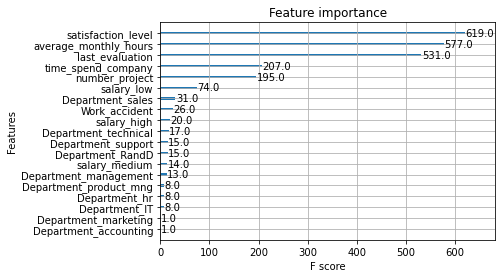

In [44]:
from xgboost import plot_importance


plot_importance(optimized_model)

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



**Satisfaction level, Average monthly hours and Last evaluation** have the highest importance in prediting **Attrition status**.

**The suggestion would be to moderate Monthly hours. Business Processes in Project 2, 6 and 7 must be improved, since they have the highest ratios of attrition.**

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.